### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

df 


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [2]:
primi_dici=df.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)
primi_dici 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
15,Belarus,142,373,42,14.4
98,Lithuania,343,244,56,12.9
3,Andorra,245,138,312,12.4
68,Grenada,199,438,28,11.9
61,France,127,151,370,11.8
45,Czech Republic,361,170,134,11.8
141,Russian Federation,247,326,73,11.5
99,Luxembourg,236,133,271,11.4
155,Slovakia,196,293,116,11.4
81,Ireland,313,118,165,11.4


In [4]:
media_birra=df['beer_servings'].mean()
media_vino=df['wine_servings'].mean()
media_spirits=df['spirit_servings'].mean()

media_totale=(media_birra + media_vino + media_spirits) / 3
print(f"Media birra: {media_birra}")
print(f"Media vino: {media_vino}") 
print(f"Media spirits: {media_spirits}")        
print(f"Media totale: {media_totale}")

Media birra: 106.16062176165804
Media vino: 49.45077720207254
Media spirits: 80.99481865284974
Media totale: 78.86873920552678


In [5]:
df['alcohol_index']=df[['beer_servings', 'wine_servings', 'spirit_servings']].mean(axis=1)
df 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
0,Afghanistan,0,0,0,0.0,0.000000
1,Albania,89,132,54,4.9,91.666667
2,Algeria,25,0,14,0.7,13.000000
3,Andorra,245,138,312,12.4,231.666667
4,Angola,217,57,45,5.9,106.333333
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,145.333333
189,Vietnam,111,2,1,2.0,38.000000
190,Yemen,6,0,0,0.1,2.000000
191,Zambia,32,19,4,2.5,18.333333


In [6]:
indice_max=df['alcohol_index'].idxmax() 
df['country'][indice_max] 

'Andorra'

In [7]:
paesi_di_consumo_alto_di_birre = df[df['beer_servings']>100].country
paesi_di_consumo_alto_di_birre

3                Andorra
4                 Angola
5      Antigua & Barbuda
6              Argentina
8              Australia
             ...        
182       United Kingdom
184                  USA
185              Uruguay
188            Venezuela
189              Vietnam
Name: country, Length: 79, dtype: object

Text(0.5, 1.0, 'Top 10 Paesi per consumo di alcol')

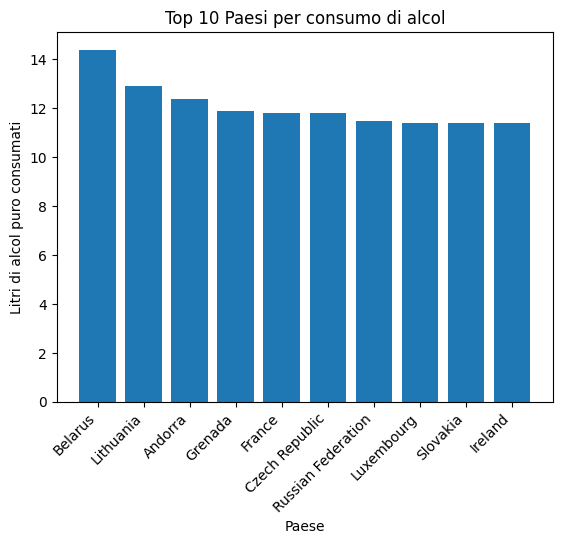

In [8]:
plt.bar(primi_dici['country'] ,primi_dici['total_litres_of_pure_alcohol'] )
plt.xticks(rotation=45, ha='right')
plt.ylabel('Litri di alcol puro consumati')
plt.xlabel('Paese')
plt.title('Top 10 Paesi per consumo di alcol')

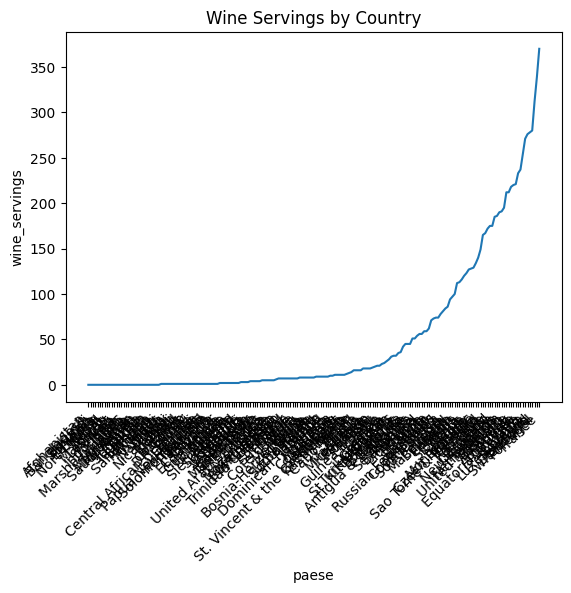

In [9]:
df_sorted=df.sort_values(by='wine_servings')
plt.plot(df_sorted['country'], df_sorted['wine_servings'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('paese')
plt.ylabel('wine_servings')
plt.title('Wine Servings by Country')
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [4]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_date']

0        2023-06-16 13:44:15
1        2023-01-14 13:18:07
2        2023-10-10 13:14:55
3        2023-07-04 13:01:41
4        2023-08-07 14:29:36
                 ...        
785736   2023-03-13 06:16:16
785737   2023-03-12 06:18:18
785738   2023-03-12 06:32:36
785739   2023-03-12 06:32:15
785740   2023-03-13 06:16:31
Name: job_posted_date, Length: 785741, dtype: datetime64[ns]

In [6]:
df_clean = df.dropna(subset=['salary_year_avg', 'job_country'])
df_clean

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


In [14]:
stats_by_country = df_clean.groupby('job_country').agg(
    avg_salary=('salary_year_avg', 'mean'),
    job_count=('salary_year_avg', 'count'),
    min_salary=('salary_year_avg', 'min'),
    max_salary=('salary_year_avg', 'max')
).reset_index()
stats_by_country  

,job_country,avg_salary,job_count,min_salary,max_salary
0,Albania,79472.500000,5,43200.0,157500.0
1,Algeria,44550.000000,2,44100.0,45000.0
2,Argentina,105212.343750,32,45000.0,222000.0
3,Armenia,78757.000000,6,45000.0,128682.0
4,Australia,118987.574324,74,20000.0,257500.0
...,...,...,...,...,...
103,Uruguay,69333.333333,3,50000.0,100500.0
104,Uzbekistan,30750.000000,1,30750.0,30750.0
105,Vietnam,90927.236364,55,28000.0,200000.0
106,Zambia,90670.000000,1,90670.0,90670.0


In [15]:
df_clean['job_title'].value_counts().sum()

np.int64(22003)

In [20]:
df_clean.groupby('job_title_short')['salary_year_avg'].agg(['min','max']).reset_index()


,job_title_short,min,max
0,Business Analyst,16500.0,387460.0
1,Cloud Engineer,42000.0,280000.0
2,Data Analyst,25000.0,650000.0
3,Data Engineer,15000.0,525000.0
4,Data Scientist,27000.0,960000.0
5,Machine Learning Engineer,30000.0,325000.0
6,Senior Data Analyst,30000.0,425000.0
7,Senior Data Engineer,35000.0,425000.0
8,Senior Data Scientist,45000.0,890000.0
9,Software Engineer,28000.0,375000.0


Text(0, 0.5, 'Job Title')

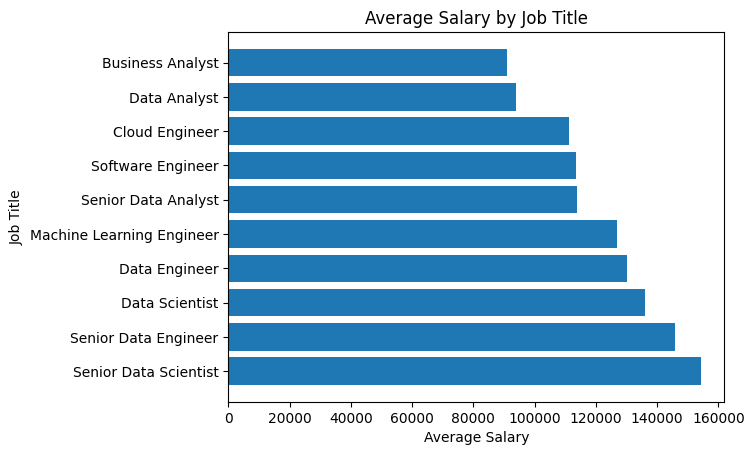

In [37]:
df_gruppato=df_clean.groupby('job_title_short')['salary_year_avg'].mean()
job_title_ordinato=df_gruppato.sort_values(ascending=False)

job_title_ordinato

plt.barh(job_title_ordinato.index, job_title_ordinato.values)

plt.title('Average Salary by Job Title')

plt.xlabel('Average Salary')
plt.ylabel('Job Title')
